In [1]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

## Ejercicio 1

p_nueva_solicitud = 1/40, p_procesada = 1/30  
Para la representación de estados se debe tener en cuenta la cantidad de solicitudes que fueron
encoladas y no procesadas. Por lo tanto se representa un estado para cada una de estas situaciones.
Por ejemplo: el sistema puede estar procesando una solicitud teniendo otra encolada. En este caso 
sistema se encuentra en estado P1E (procesando con una solicitud encolada), si llega una nueva solicitud
con p = 1/40 pasa a P2E, en cambio si esprocesada con p = 1/30 pasa a P0E, y asi siguiendo...La probabilidad
de permanecer en un estado PiE es p = 1 - (1/40 + 1/30) = 113/120.

TODO: Subir un dibujito como queda el diagrama de estados.

#### a. Matriz de transición
La matriz de transición de estados esta dada por la probabilidad que el sistema tiene de pasar de un estado al otro.  
Con los estados: SP (sin procesar), PiE (procesando con i encolados, i en Naturales).

#### La matriz de transición resulta:

[ 39/40  1/40       0         0      0   0    0   ... ]  
[ 1/30   113/120  1/40        0      0   0    0   ... ]  
[ 0      1/30     113/120    1/40    0   0    0   ... ]  
....

#### b. Simular 1000 s, Eo = SP, 30 estados posibles.
30 estados posibles, por lo tanto los estados serán: SP, P0E ... P28E.

In [194]:
# Armo la matriz de transición
p_nueva_solicitud = 1/40
p_procesada = 1/30
p_mantenerse = 1 - (p_procesada + p_nueva_solicitud)

aux = [p_procesada, p_mantenerse, p_nueva_solicitud]
M = []
for i in range(30):
    if i == 0:
        fila = [(1 - p_nueva_solicitud), p_nueva_solicitud] + [0 for x in range(28)]
    elif i == 29:
        fila = [0 for x in range(28)] + [p_procesada, (1 - p_procesada)]
    else:
        fila = [0 for x in range(i-1)] + aux + [0 for x in range(30 - (i + 2))]
    M.append(fila)

len(M)

30

In [195]:
import random
random.seed(10)

def index_p(x, n):
    i = 0
    acc = 0
    for v in x:
        if v != 0:
            acc += v
            if n < acc:
                return i
        i+=1

def state_from_v(x):
    return ESTADOS[x.index(1)]
        
def v_from_index(i):
    aux = [0] * 30
    aux[i] = 1
    return aux

ITERACIONES = 100000
ESTADOS = ['SP'] + ['P{}E'.format(x) for x in range(29)]
COUNT_ESTADOS = {}
SOLICITUDES = []
x = v_from_index(0) # Comienza en Sin Procesar.

for i in range(ITERACIONES):
    result = np.dot(x, M)
    index = index_p(result, random.random())
    x = v_from_index(index)
    # Estadisticas
    next_state = state_from_v(x)
    COUNT_ESTADOS[next_state] = COUNT_ESTADOS.get(next_state, 0) + 1
    SOLICITUDES.append(index)

#### c.

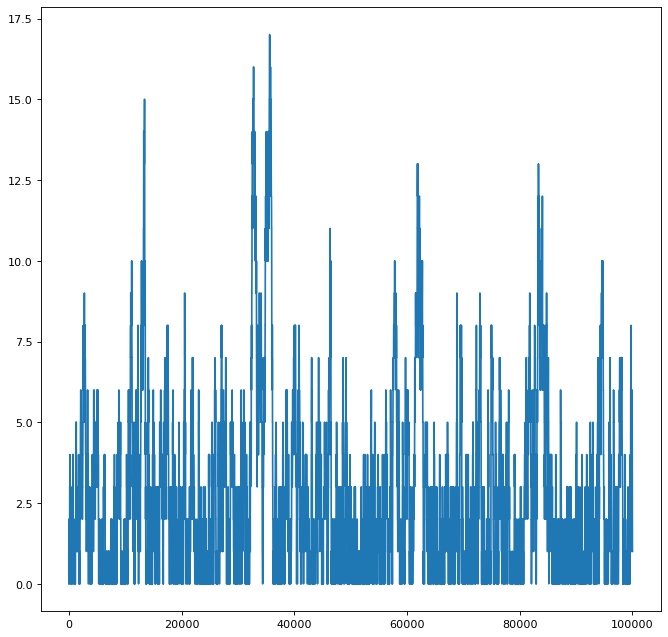

In [217]:
# Cantidad de solicitudes en cada instante de tiempo.
figure(figsize=(10,10), dpi=80)
plt.plot(SOLICITUDES)

#### D.

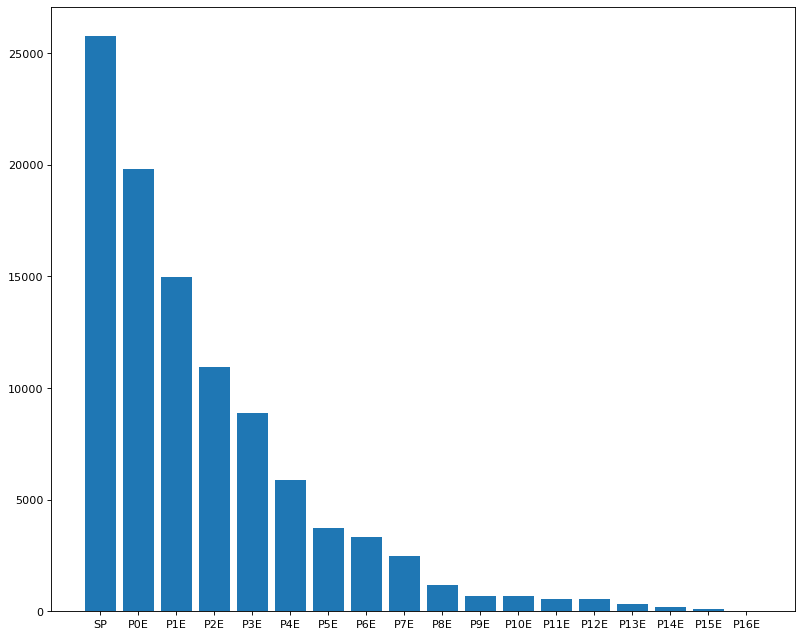

In [210]:
# Histograma por estado.
figure(figsize=(12,10), dpi=80)

plt.bar(list(COUNT_ESTADOS.keys()), COUNT_ESTADOS.values())
plt.show()

#### e. % de Tiempo en el estado Sin Procesar (SP)

In [198]:
(COUNT_ESTADOS['SP'] / sum(COUNT_ESTADOS.values())) * 100

25.759999999999998


## Ejercicio 2

#### a. calcular los puntos de equilibrio

Planteamos las ecuaciones en equilibrio.  
xt = xt-1 = xeq = x; yt = yt-1 = yeq = y; zt = zt-1 = zeq = z  
las reglas quedan entonces:  
x = x / 2 + y  
y = y - x /2  
z = z - x - y  

A priori P1 = (0, 0, 0) es un punto de equilibrio. Se observa también que para cualquier z, 
tomando x = 0, y = 0, son puntos de equilibrio.

Rta: p (x, y, z) / x = 0, y = 0, para todo z en R.

#### b. Graficar el diagrama de fases mostrando 100 iteraciones del sistema.

In [199]:
P = [-1, 0, 1]
puntos_de_inicio = []
for x in P:
    for y in P:
        for z in P:
            puntos_de_inicio.append([x, y, z])

In [200]:
# Simulamos 100 iteraciones con cada punto de inicio.
total_sim = []
for p_inicio in puntos_de_inicio:
    x_sim, y_sim, z_sim = [], [], []
    x, y, z = p_inicio
    x_sim.append(x)
    y_sim.append(y)
    z_sim.append(z)
    for i in range (0, 100):
        x, y, z = [x_sim[i], y_sim[i], z_sim[i]]
        x_t = x / 2 + y
        y_t = y - x / 2
        z_t = z - (x + y)
        x_sim.append(x_t)
        y_sim.append(y_t)
        z_sim.append(z_t)
        
    total_sim.append([x_sim, y_sim, z_sim])

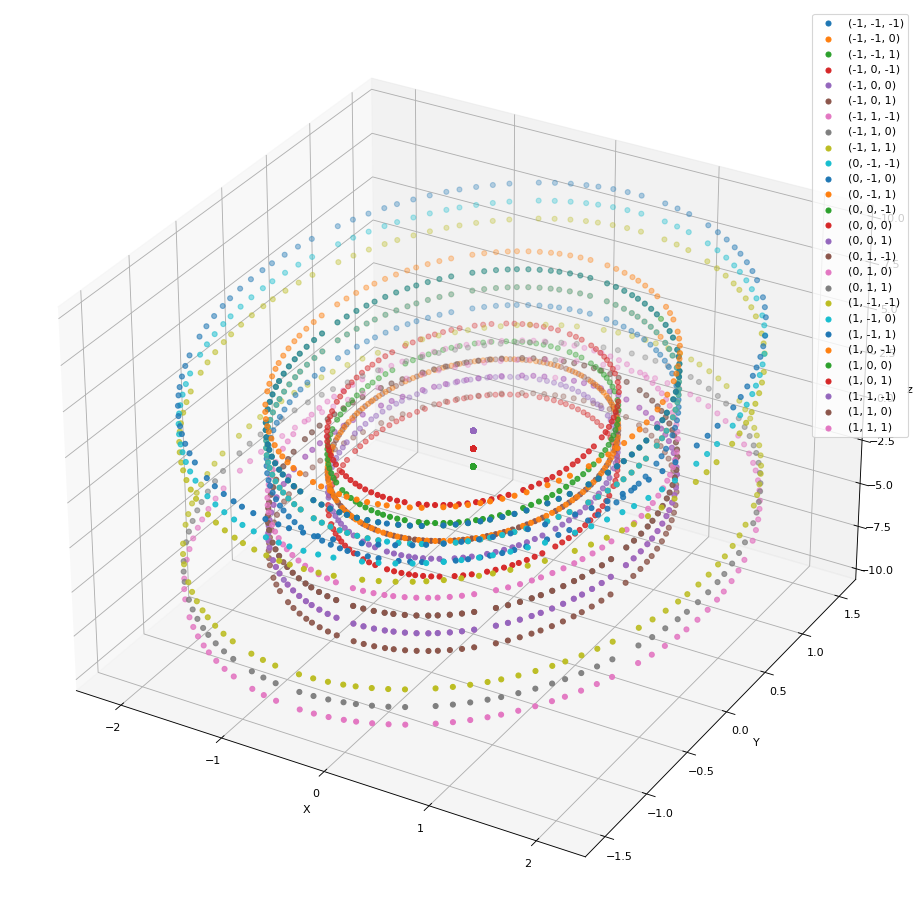

In [206]:
# Si bien es un sistema discreto, realizamos un gráfico continuo para visualizar
# aún mejor la evolución del mismo.
figure(figsize=(15,15), dpi=80)
ax = plt.axes(projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('z')

for idx, sim in enumerate(total_sim):
    x0, y0, z0 = puntos_de_inicio[idx]
    xline = sim[0]
    yline = sim[1]
    zline = sim[2]
    ax.scatter3D(
        xline, 
        yline, 
        zline,
        label='({}, {}, {})'.format(x0, y0, z0)
    )
    
ax.legend()


## Ejercicio 3

Los datos que nos dan son:
* población se encuentra infectada I0 = 2.5% = 0.025
* población es susceptible de contagiarse S = 1
* tasa de transmisión β = 0,27
* tasa de recuperación γ = 0,043

Modelo S.I.R. 
* S'(t) = -βSI / N
* I'(t) = βSI / N - γI
* R'(t) = γI

Metodo Runge Kutta
* y' = f(x, y), $y(x_0) = y_0$
* $y_{i+1} = y_i + 1/6 h(k_1 + 2k_2 + 2 k_3 + k_4)$
* $k_1 = f(x_i, y_i)$
* $k_2 = f(x_i + 1/2h, y_i + 1/2k_1h)$
* $k_3 = f(x_i + 1/2h, y_i + 1/2k_2h)$
* $k_4 = f(x_i + h, y_i + k_3h)$
* h: tamaño del intervalo

In [2]:
def SIR_model(x, beta, gamma, population):
    s, i, r = x
    x_next = np.array([0.0, 0.0, 0.0])
    x_next[0] = -beta * s * i / population
    x_next[1] = beta * s * i / population - gamma * i
    x_next[2] = gamma * i
    return x_next

In [3]:
def RK4(f, x0, h, T, beta, gamma, population):
    t0 = T[0]
    tf = T[1]
    N = np.int((tf - t0) / h)
    
    t = np.array([0.0 for i in range(0, N)])
    x = np.array([[0.0, 0.0, 0.0] for i in range(0, N)])
    t[0] = 0
    x[0] = x0
    
    for n in range(1, N):
        k1 = h * f(x[n-1], beta, gamma, population)
        k2 = h * f(x[n-1] + 0.5 * k1, beta, gamma, population)
        k3 = h * f(x[n-1] + 0.5 * k2, beta, gamma, population)
        k4 = h * f(x[n-1] + k3, beta, gamma, population)
        x[n] = x[n-1] + (1/6) * (k1 + 2*k2 + 2*k3 + k4)
        t[n] = t[n-1] + h
    return (x, t)

In [4]:
population = 1
I0 = population * 0.025
R0 = 0
S0 = population - I0 - R0

h = 1

beta = 0.27
gamma = 0.043

x0 = [S0,I0,R0]
x = RK4(SIR_model, x0, h, [0,200], beta, gamma, population)

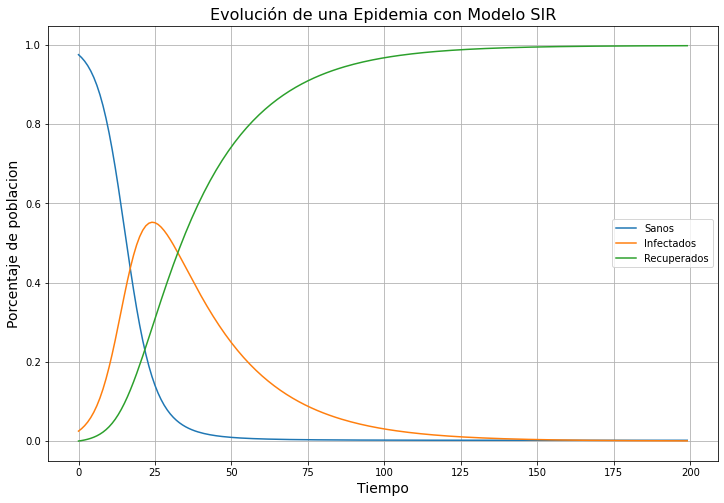

In [5]:
plt.figure(figsize=(12,8))
plt.plot(x[0])
plt.title('Evolución de una Epidemia con Modelo SIR', fontsize=16)
plt.xlabel('Tiempo', fontsize=14)
plt.ylabel('Porcentaje de poblacion', fontsize=14)
plt.legend(['Sanos', 'Infectados', 'Recuperados'])
plt.grid()

### Sistema de salud con límite de asistencia

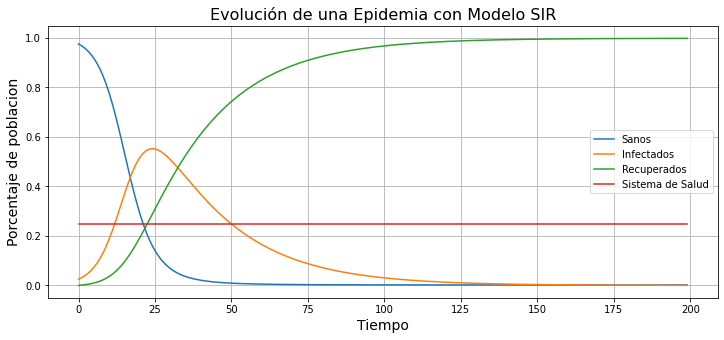

In [6]:
plt.figure(figsize=(12,5))
plt.plot(x[0])
plt.plot([0.25 for i in range(0, len(x[0]))])
plt.title('Evolución de una Epidemia con Modelo SIR', fontsize=16)
plt.xlabel('Tiempo', fontsize=14)
plt.ylabel('Porcentaje de poblacion', fontsize=14)
plt.legend(['Sanos', 'Infectados', 'Recuperados', 'Sistema de Salud'])
plt.grid()

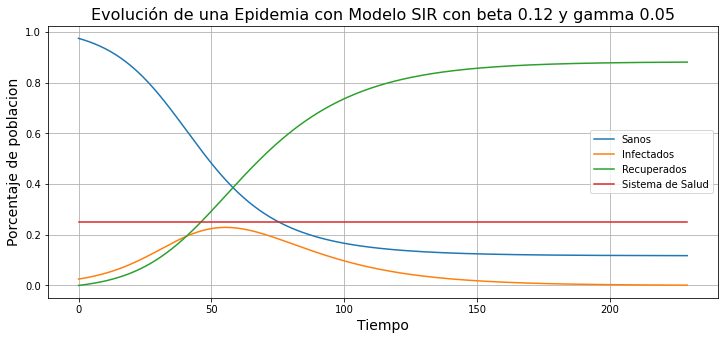

In [7]:
population = 1
I0 = population * 0.025
R0 = 0
S0 = population - I0 - R0

h = 1

beta = 0.12
gamma = 0.05

x0 = [S0,I0,R0]
x = RK4(SIR_model, x0, h, [0,230], beta, gamma, population)

plt.figure(figsize=(12,5))
plt.plot(x[0])
plt.plot([0.25 for i in range(0, len(x[0]))])
plt.title('Evolución de una Epidemia con Modelo SIR con beta ' + str(beta) + ' y gamma ' + str(gamma), fontsize=16)
plt.xlabel('Tiempo', fontsize=14)
plt.ylabel('Porcentaje de poblacion', fontsize=14)
plt.legend(['Sanos', 'Infectados', 'Recuperados', 'Sistema de Salud'])
plt.grid()

Sabiendo que el sistema de salud puede asistir cómo máximo sólo al 25% de la población a la vez, determinar la
duración total de la epidemia si se quiere que el pico máximo de infectados no supere las capacidades de asistencia
médica. ¿Qué parámetros se modifican? ¿Por qué?

Disminuiría el parámetro beta a medida que aumento gamma, disminuyo beta para lograr menos contagios durante la epidemia 
y en especial en el pico. También aumento gamma para que los infectados se recuperen más rápido, no necesiten atención del 
sistema de salud y no infecten a más personas.

La epidemia duraría aproximadamente 200 días, pasado este tiempo el modelo se estabiliza quedando un porcentaje de la población
sin haberse infectado. Esta duración es mayor que con los parámetros anteriores, que era de 130 días aproximadamente.

### Experimentos con distintos parámetros

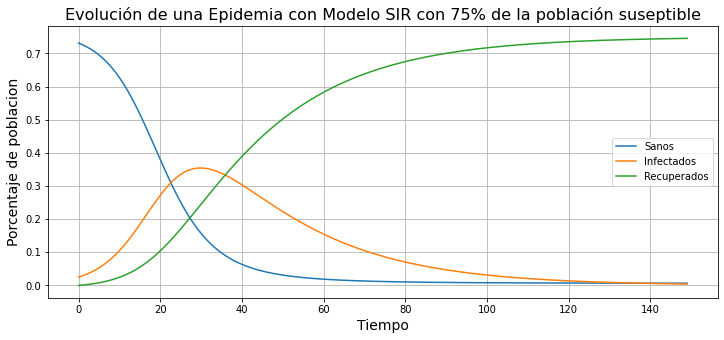

In [8]:
population = 1
I0 = population * 0.025
R0 = 0
S0 = (population - I0 - R0) * 0.75

h = 1

beta = 0.27
gamma = 0.043

x0 = [S0,I0,R0]
x = RK4(SIR_model, x0, h, [0,150], beta, gamma, population)

plt.figure(figsize=(12,5))
plt.plot(x[0])
plt.title('Evolución de una Epidemia con Modelo SIR con 75% de la población suseptible', fontsize=16)
plt.xlabel('Tiempo', fontsize=14)
plt.ylabel('Porcentaje de poblacion', fontsize=14)
plt.legend(['Sanos', 'Infectados', 'Recuperados'])
plt.grid()

En este gráfico se modifico el porcentaje de población suseptible a infectarse.

A diferencia del primer modelo, el pico máximo de infectados es del 35% de la población 
y dura aproximadamente 200 días. En el primer caso, el pico máximo era del 55% de la población
infectada y duraba aproximadamente 130 días.

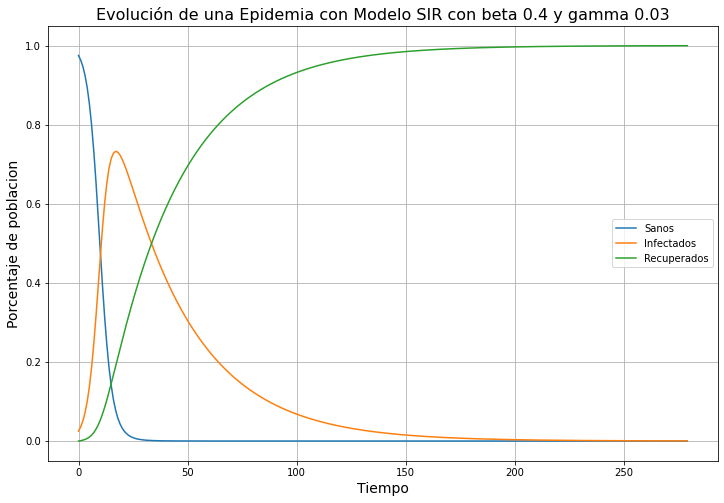

In [186]:
population = 1
I0 = population * 0.025
R0 = 0
S0 = population - I0 - R0

h = 1

beta = 0.4
gamma = 0.03

x0 = [S0,I0,R0]
x = RK4(SIR_model, x0, h, [0,280], beta, gamma, population)

plt.figure(figsize=(12,8))
plt.plot(x[0])
plt.title('Evolución de una Epidemia con Modelo SIR con beta 0.4 y gamma 0.03', fontsize=16)
plt.xlabel('Tiempo', fontsize=14)
plt.ylabel('Porcentaje de poblacion', fontsize=14)
plt.legend(['Sanos', 'Infectados', 'Recuperados'])
plt.grid()

En este gráfico se aumentó la tasa de transmisión beta a 0.4, y se redujo la tasa de recuperación gamma a 0.03.

A diferencia del primer modelo, el pico máximo de infectados ocurre antes (en el día 20 aprox.)
y es del 70% de la población infectada, dura aproximadamente 200 días la epidemia. 
En el primer caso, el pico máximo ocurría a los 50 días (aprox.).

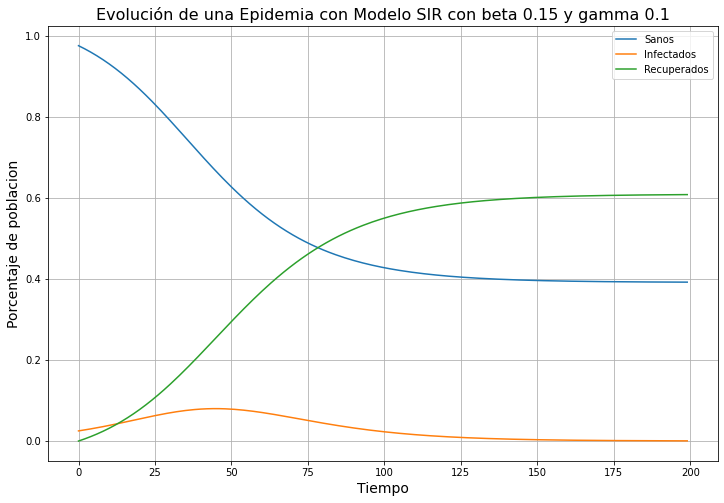

In [197]:
population = 1
I0 = population * 0.025
R0 = 0
S0 = population - I0 - R0

h = 1

beta = 0.15
gamma = 0.1

x0 = [S0,I0,R0]
x = RK4(SIR_model, x0, h, [0,200], beta, gamma, population)

plt.figure(figsize=(12,8))
plt.plot(x[0])
plt.title('Evolución de una Epidemia con Modelo SIR con beta 0.15 y gamma 0.1', fontsize=16)
plt.xlabel('Tiempo', fontsize=14)
plt.ylabel('Porcentaje de poblacion', fontsize=14)
plt.legend(['Sanos', 'Infectados', 'Recuperados'])
plt.grid()

En este gráfico se redujo la tasa de transmisión beta a 0.15, y se aumentó la tasa de recuperación gamma a 0.1.

En este caso el pico de infectados es del 10% aproximado y la epidemia tiene una duración de 150 días aprox.
Dada la baja tasa de transmisión y alta tasa de recuperación, el 40% (aprox.) de la población no llega a infectarse
y el sistema queda estable.